In [45]:
import numpy as np
import pandas as pd 
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [46]:
df=pd.read_csv('DataCoSupplyChainDataset.csv',encoding='latin-1')
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [47]:
df.shape

(180519, 53)

### Drop unnecessary columns

In [48]:
df1 = df.drop(columns=['Days for shipping (real)','Days for shipment (scheduled)','Category Id','Customer Email','Customer Fname','Customer Lname','Customer Password','Department Id','Product Image','Product Description','Order Zipcode'])

In [49]:
df1.shape

(180519, 42)

### Data cleaning

In [50]:
df1.isnull().sum()

Type                          0
Benefit per order             0
Sales per customer            0
Delivery Status               0
Late_delivery_risk            0
Category Name                 0
Customer City                 0
Customer Country              0
Customer Id                   0
Customer Segment              0
Customer State                0
Customer Street               0
Customer Zipcode              3
Department Name               0
Latitude                      0
Longitude                     0
Market                        0
Order City                    0
Order Country                 0
Order Customer Id             0
order date (DateOrders)       0
Order Id                      0
Order Item Cardprod Id        0
Order Item Discount           0
Order Item Discount Rate      0
Order Item Id                 0
Order Item Product Price      0
Order Item Profit Ratio       0
Order Item Quantity           0
Sales                         0
Order Item Total              0
Order Pr

In [51]:
df1['Customer Zipcode'] = df1['Customer Zipcode'].fillna(0)

<Axes: >

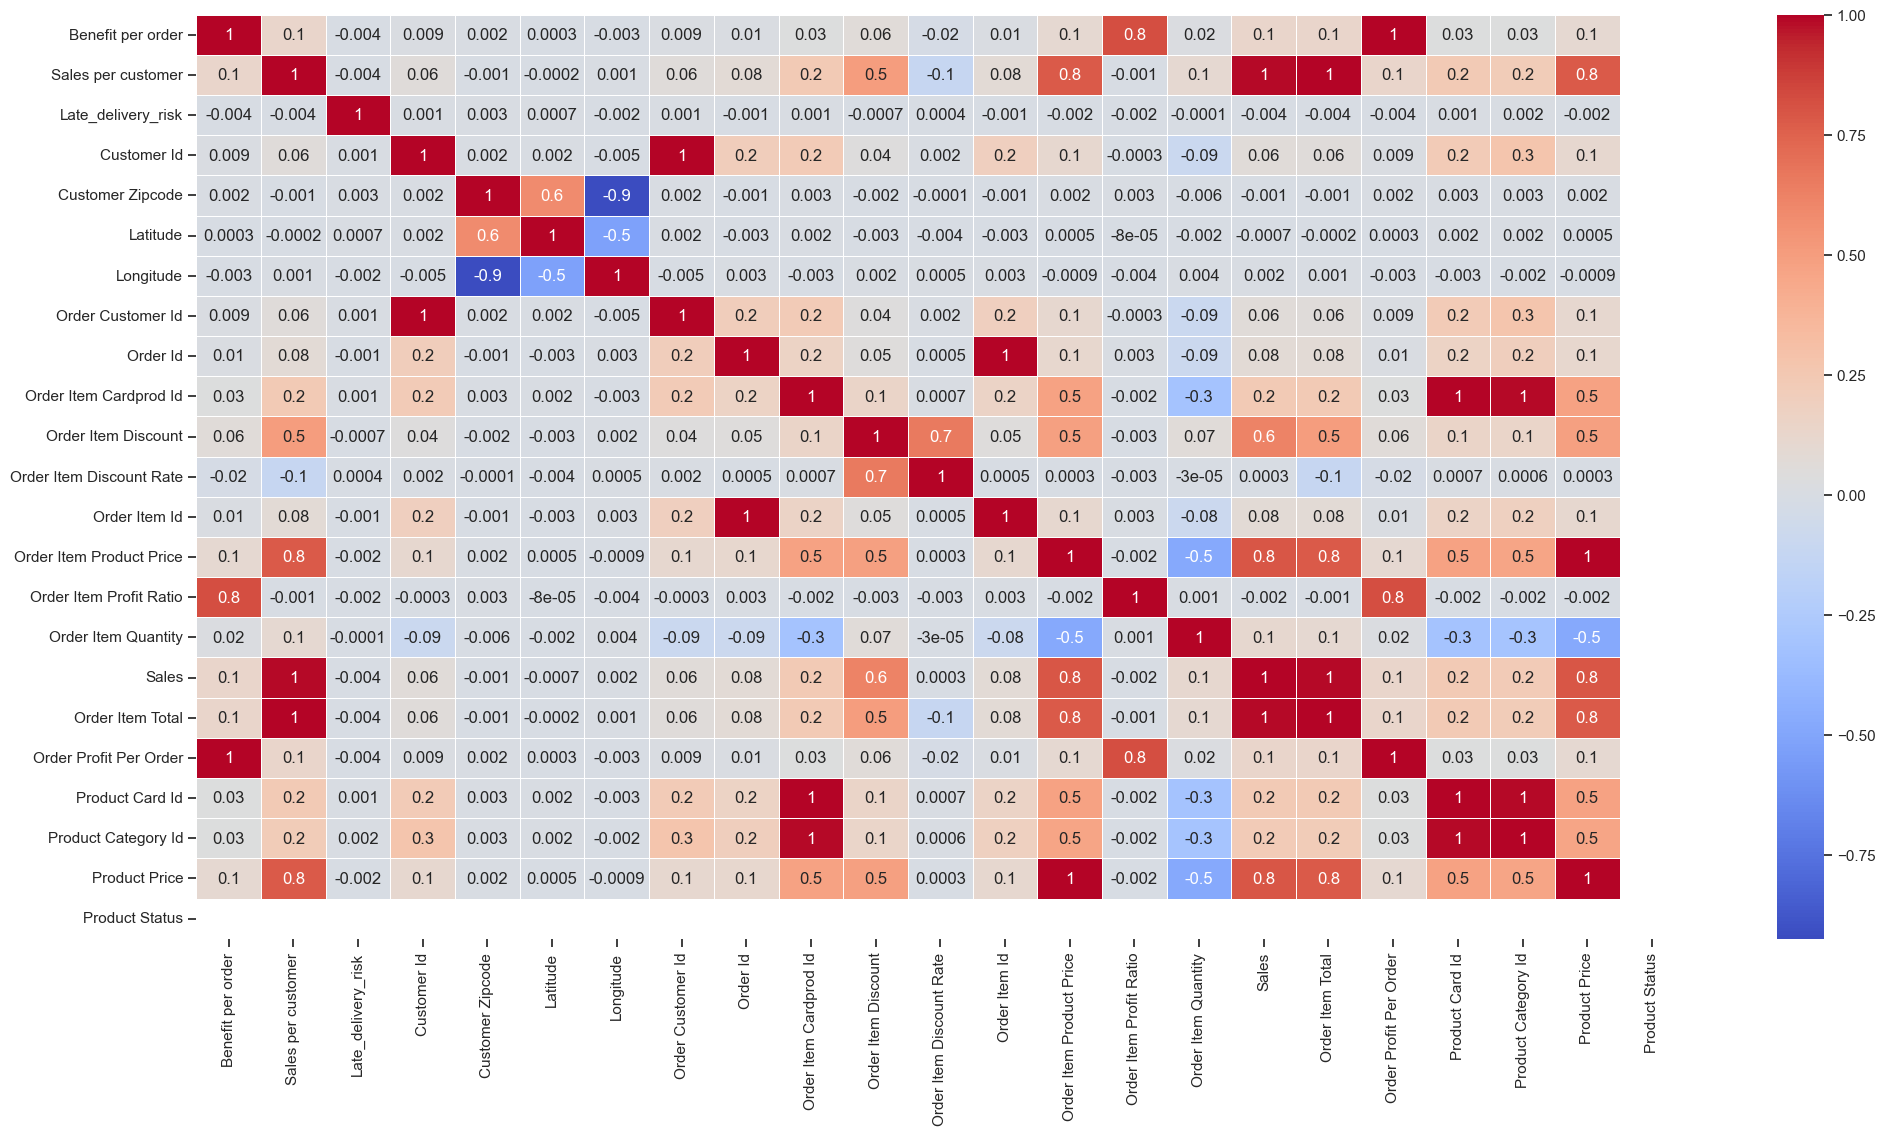

In [52]:
df1_dtypes = df1.dtypes
float_cols = df1_dtypes.iloc[(df1_dtypes!='object').values].index
fig, ax = plt.subplots(figsize=(24,12)) # figsize
sns.heatmap(df1[float_cols].corr(),annot=True,linewidths=.5,fmt='.1g',cmap= 'coolwarm') # Heatmap for correlation matrix

### Sales Analysis

<Axes: title={'center': 'Average price'}, xlabel='Category Name'>

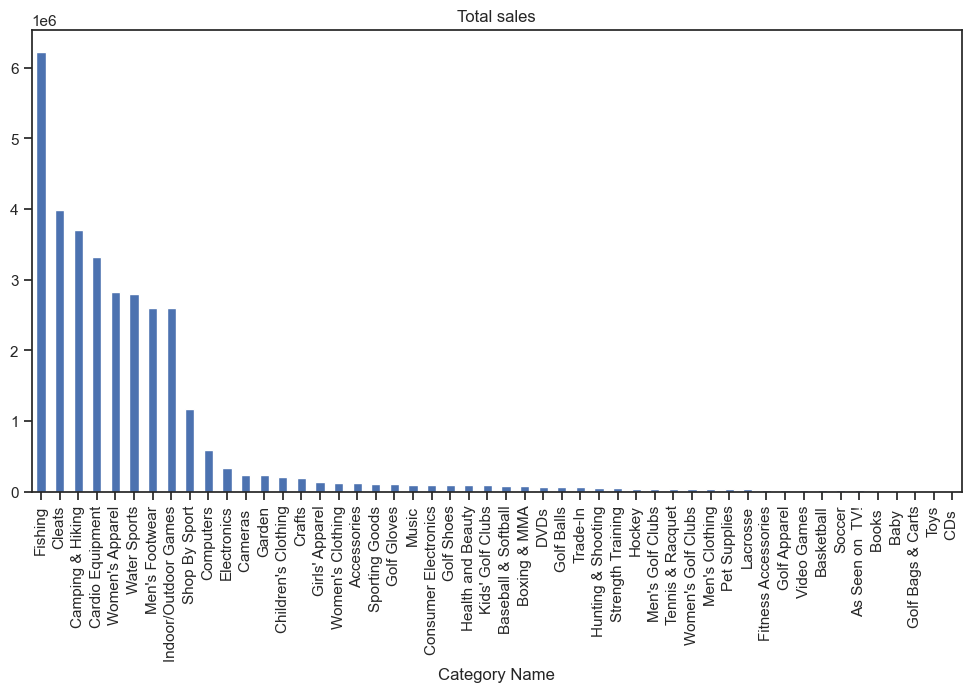

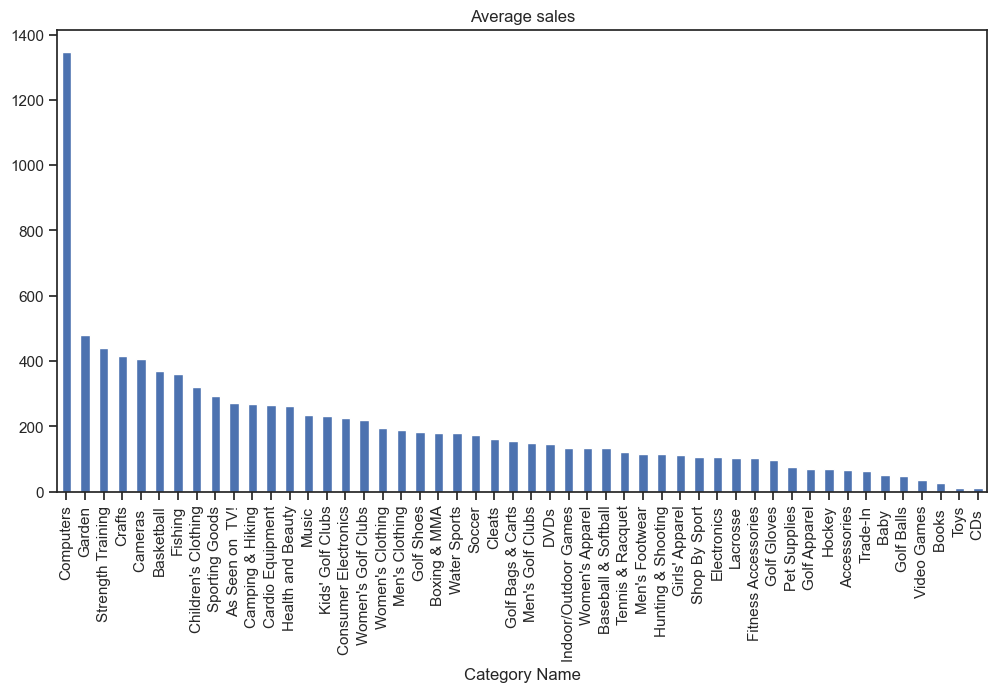

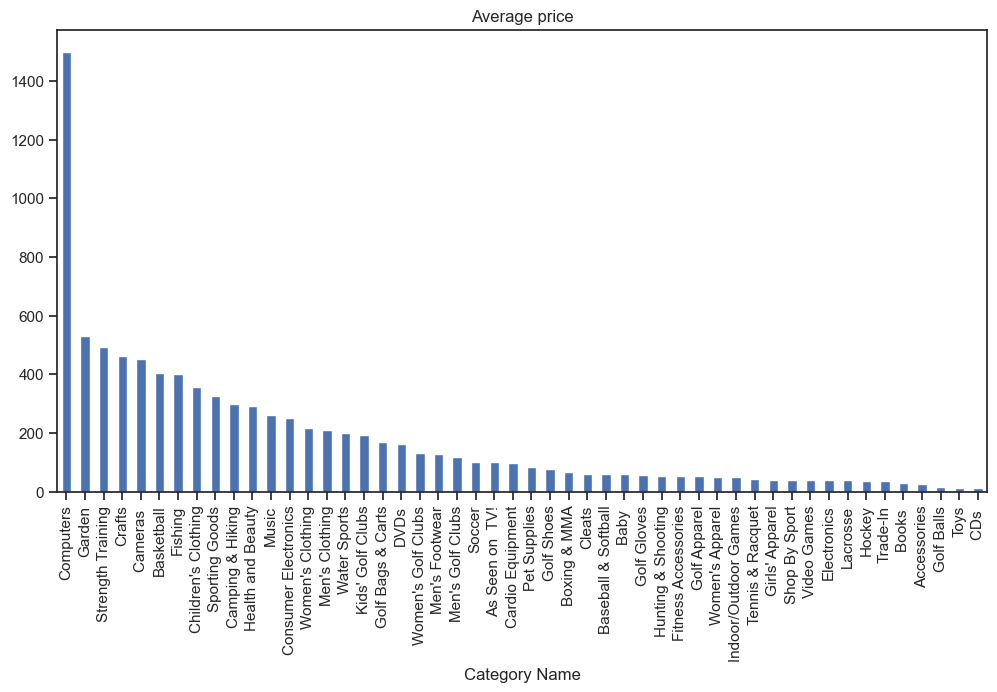

In [53]:
#Grouping all categories
cat = df.groupby('Category Name')
plt.figure(1)
# Total sum of sales for all categories
cat['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales")
# Mean sales for all categories
plt.figure(2)
cat['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average sales")
plt.figure(3)
# Mean prices for all categories
cat['Product Price'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average price")

In [54]:
data = df.copy()

In [55]:
data['order_year']= pd.to_datetime(data['order date (DateOrders)']).dt.year
data['order_month'] = pd.to_datetime(data['order date (DateOrders)']).dt.month
data['order_week_day'] = pd.to_datetime(data['order date (DateOrders)']).dt.day_name()
data['order_hour'] = pd.to_datetime(data['order date (DateOrders)']).dt.hour
data['order_month_year'] = pd.to_datetime(data['order date (DateOrders)']).dt.to_period('M')

In [56]:
data[['order_year','order_month','order_week_day','order_hour','order_month_year']].head(2)

,order_year,order_month,order_week_day,order_hour,order_month_year
0,2018,1,Wednesday,22,2018-01
1,2018,1,Saturday,12,2018-01


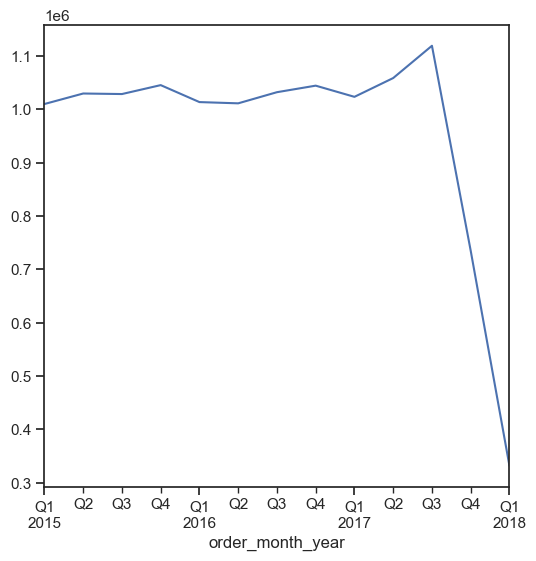

In [57]:
quater= data.groupby('order_month_year')
quartersales=quater['Sales'].sum().resample('Q').mean().plot(figsize=(6,6))

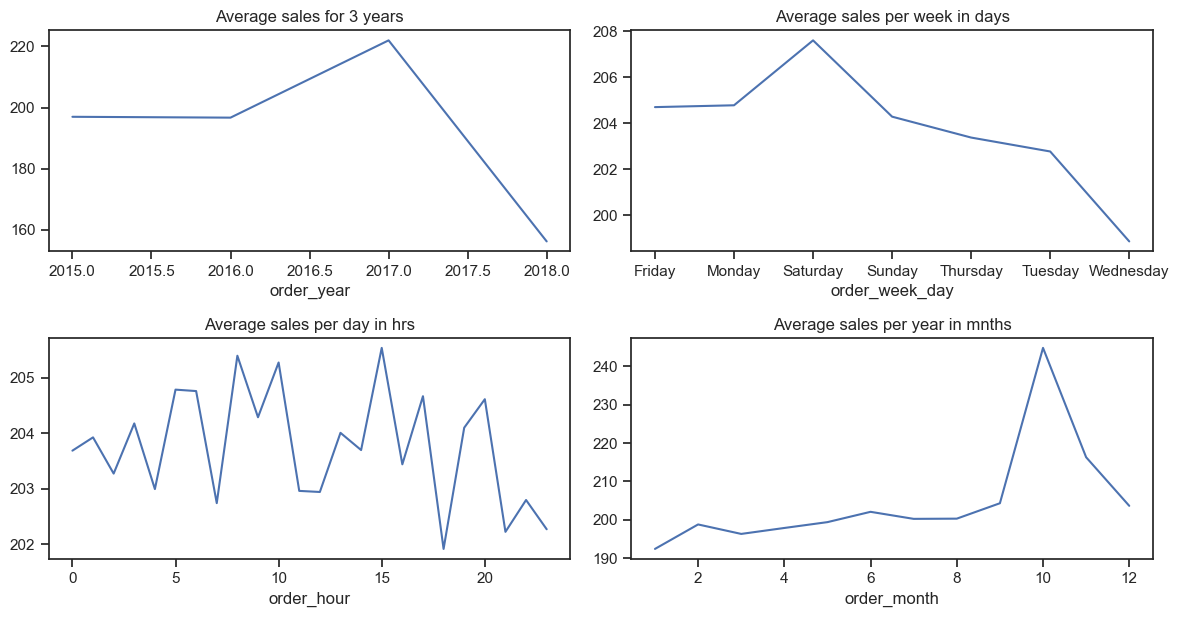

In [58]:
plt.figure(figsize=(10,12))
plt.subplot(4, 2, 1)
quater= data.groupby('order_year')
quater['Sales'].mean().plot(figsize=(12,12),title='Average sales for 3 years')
plt.subplot(4, 2, 2)
days=data.groupby("order_week_day")
days['Sales'].mean().plot(figsize=(12,12),title='Average sales per week in days')
plt.subplot(4, 2, 3)
hrs=data.groupby("order_hour")
hrs['Sales'].mean().plot(figsize=(12,12),title='Average sales per day in hrs')
plt.subplot(4, 2, 4)
mnth=data.groupby("order_month")
mnth['Sales'].mean().plot(figsize=(12,12),title='Average sales per year in mnths')
plt.tight_layout()
plt.show()

Total revenue lost with orders -3883547.345768667


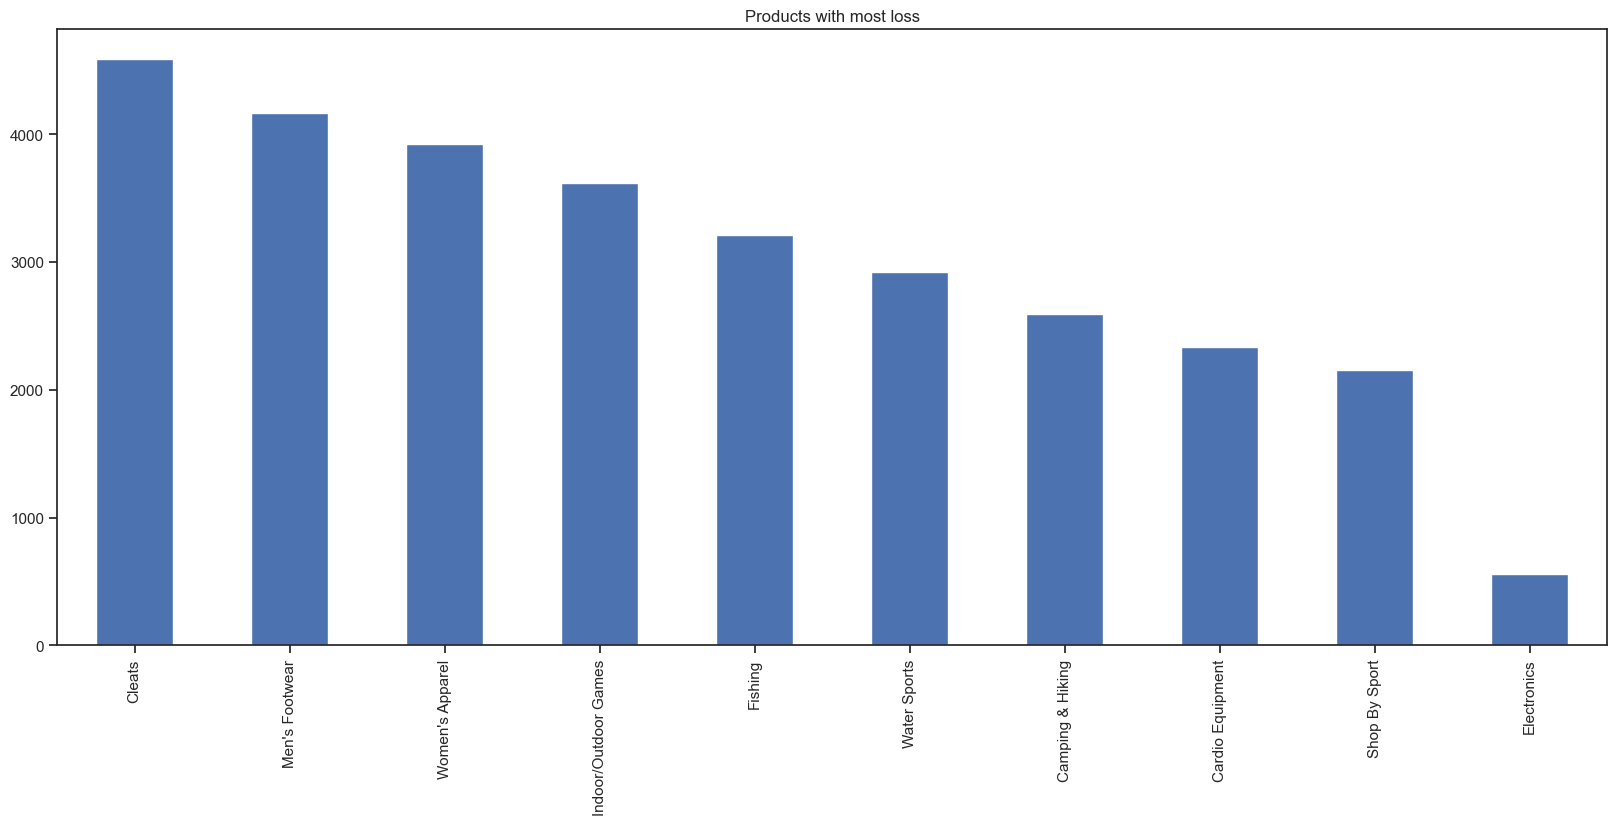

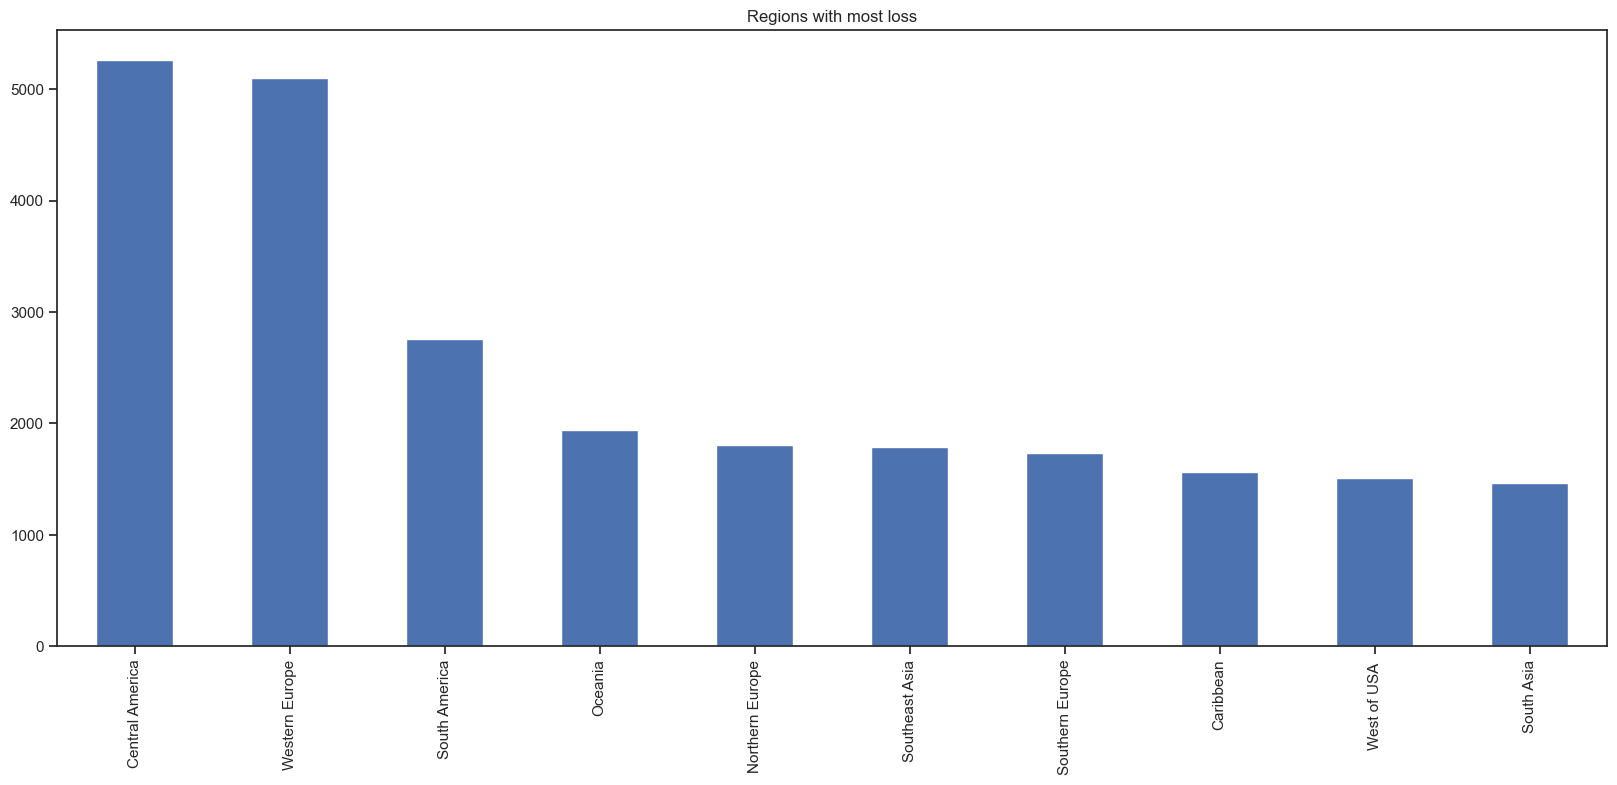

In [59]:
loss = data[(data['Benefit per order']<0)]
#Plotting top 10 products with most loss
plt.figure(1)
loss['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Products with most loss")
plt.figure(2)
loss['Order Region'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Regions with most loss")
#Sum of total sales which are lost
print('Total revenue lost with orders',loss['Benefit per order'].sum())

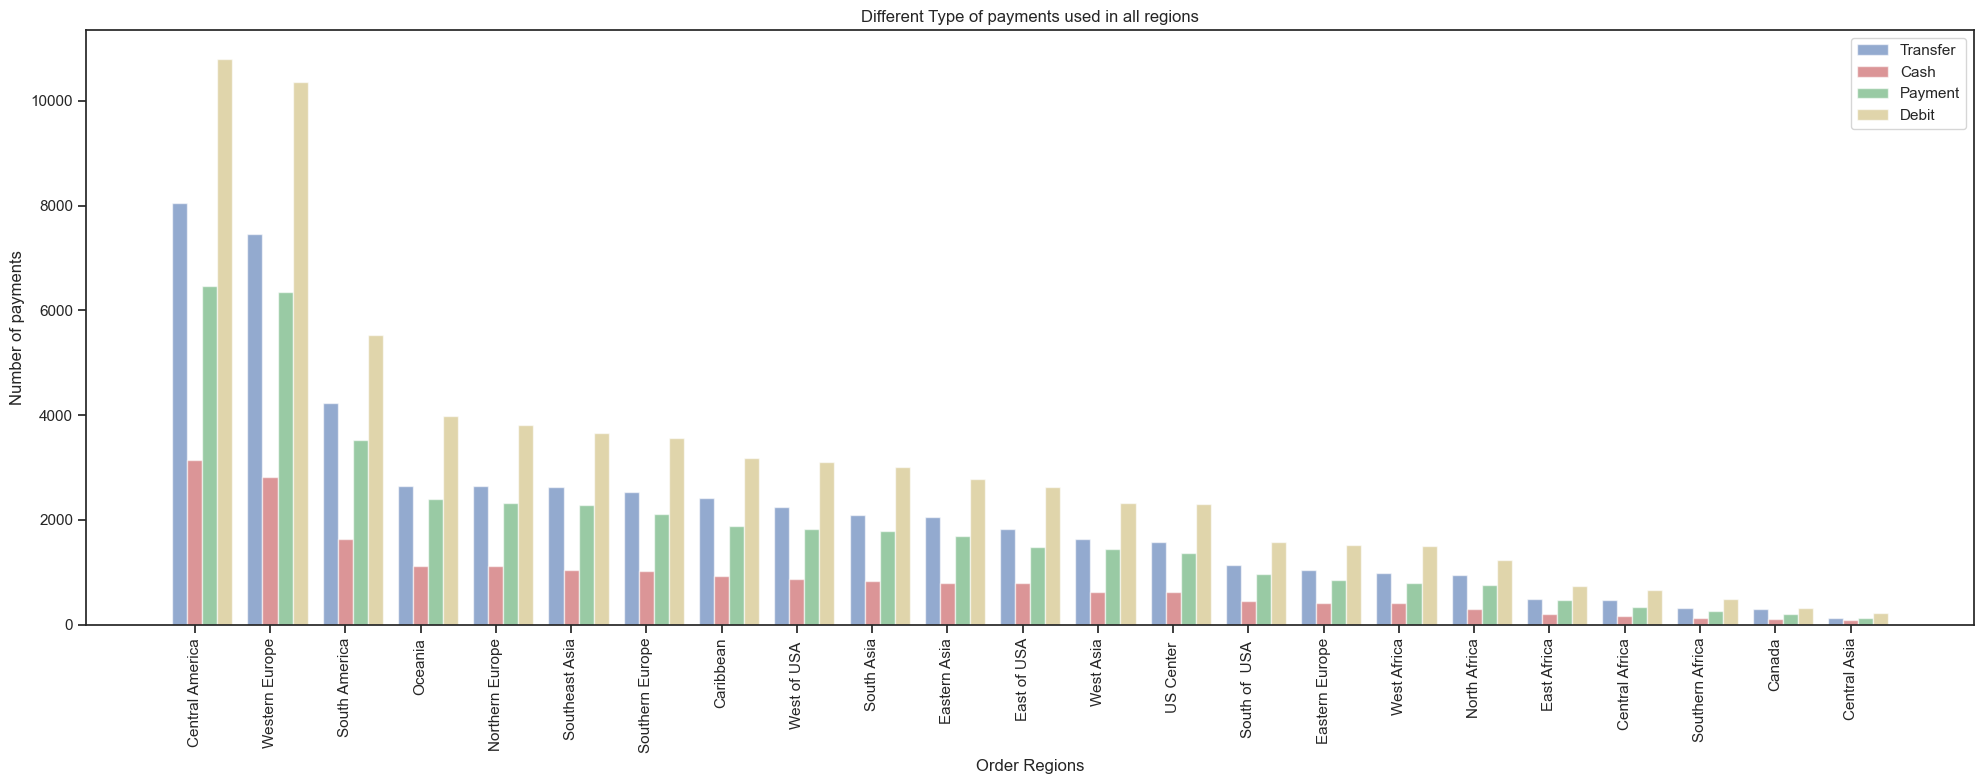

In [60]:
xyz1 = data[(data['Type'] == 'TRANSFER')]
xyz2= data[(data['Type'] == 'CASH')]
xyz3= data[(data['Type'] == 'PAYMENT')]
xyz4= data[(data['Type'] == 'DEBIT')]
count1=xyz1['Order Region'].value_counts()
count2=xyz2['Order Region'].value_counts()
count3=xyz3['Order Region'].value_counts()
count4=xyz4['Order Region'].value_counts()
names=data['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8))
index=np.arange(n_groups)
bar_width=0.2
opacity=0.6
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='b',label='Transfer')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='r',label='Cash')
type3=plt.bar(index+bar_width+bar_width,count3,bar_width,alpha=opacity,color='g',label='Payment')
type4=plt.bar(index+bar_width+bar_width+bar_width,count4,bar_width,alpha=opacity,color='y',label='Debit')
plt.xlabel('Order Regions')
plt.ylabel('Number of payments')
plt.title('Different Type of payments used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()

### Regional Analysis

<Axes: title={'center': 'Total sales for all regions'}, xlabel='Order Region'>

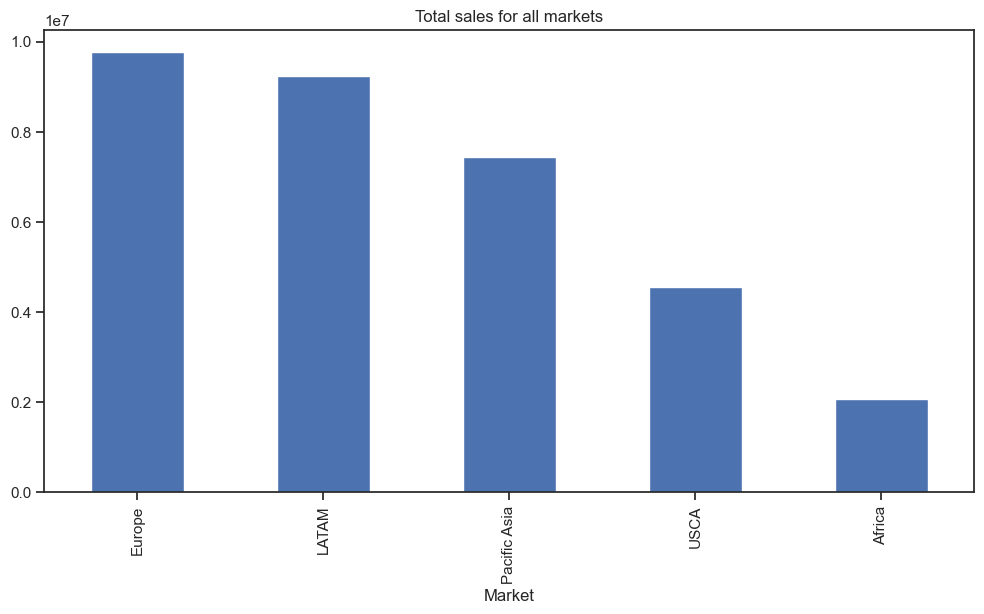

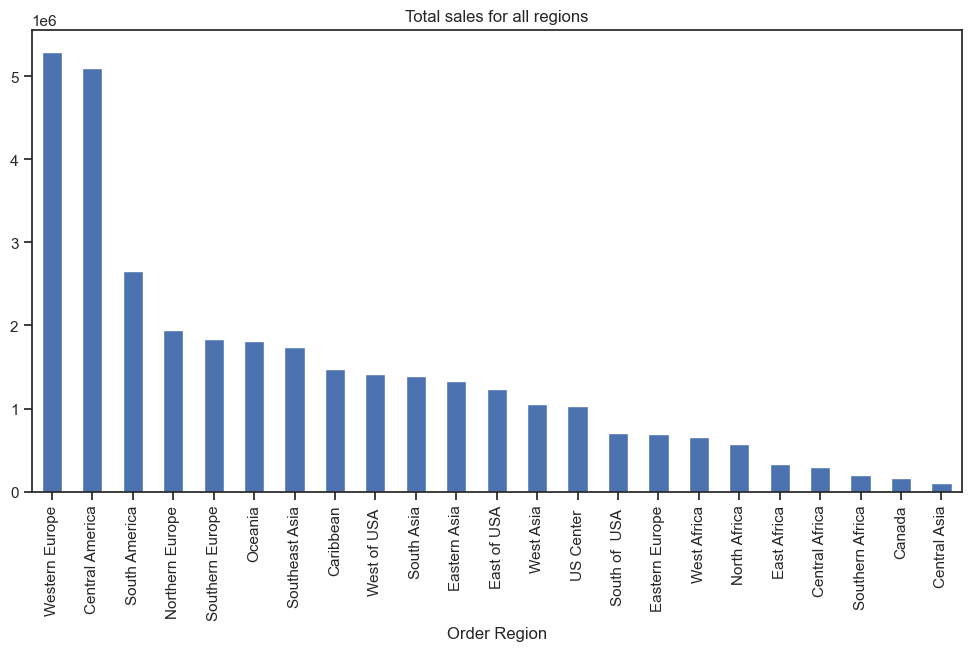

In [61]:
market = df.groupby('Market') #Grouping by market
region = df.groupby('Order Region')
plt.figure(1)
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all markets")
plt.figure(2)
region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all regions")

In [62]:
df_geo=data.groupby([ 'Order Country', 'Order State', 'Order City'])['Order Profit Per Order'].sum().reset_index(name='Profit of Orders').sort_values(by= 'Profit of Orders', ascending= False)
df_geo

,Order Country,Order State,Order City,Profit of Orders
3366,República Dominicana,Santo Domingo,Santo Domingo,51111.670019
1588,Estados Unidos,Nueva York,New York City,47889.759868
2241,Honduras,Francisco Morazán,Tegucigalpa,40973.640056
1259,Estados Unidos,California,Los Angeles,38014.360024
2943,Nicaragua,Managua,Managua,34319.950107
...,...,...,...,...
882,China,Liaoning,Dalian,-1588.609972
2,Afganistán,Kandahar,Kandahar,-1681.830001
3225,Reino Unido,Inglaterra,Dudley,-1742.079996
2538,Italia,Apulia,Cerignola,-2212.530012


In [63]:
fig = px.choropleth(df_geo ,  locationmode='country names', locations='Order Country',
                    color='Profit of Orders', # lifeExp is a column of data
                    hover_name='Order Country', 
                    #hover_data ='Order City',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

In [64]:
fig = px.choropleth(df_geo ,  locationmode='country names', locations='Order Country',
                    color='Profit of Orders', # lifeExp is a column of data
                    hover_name='Order Country', 
                    scope='asia',
                    #hover_data ='Order City',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

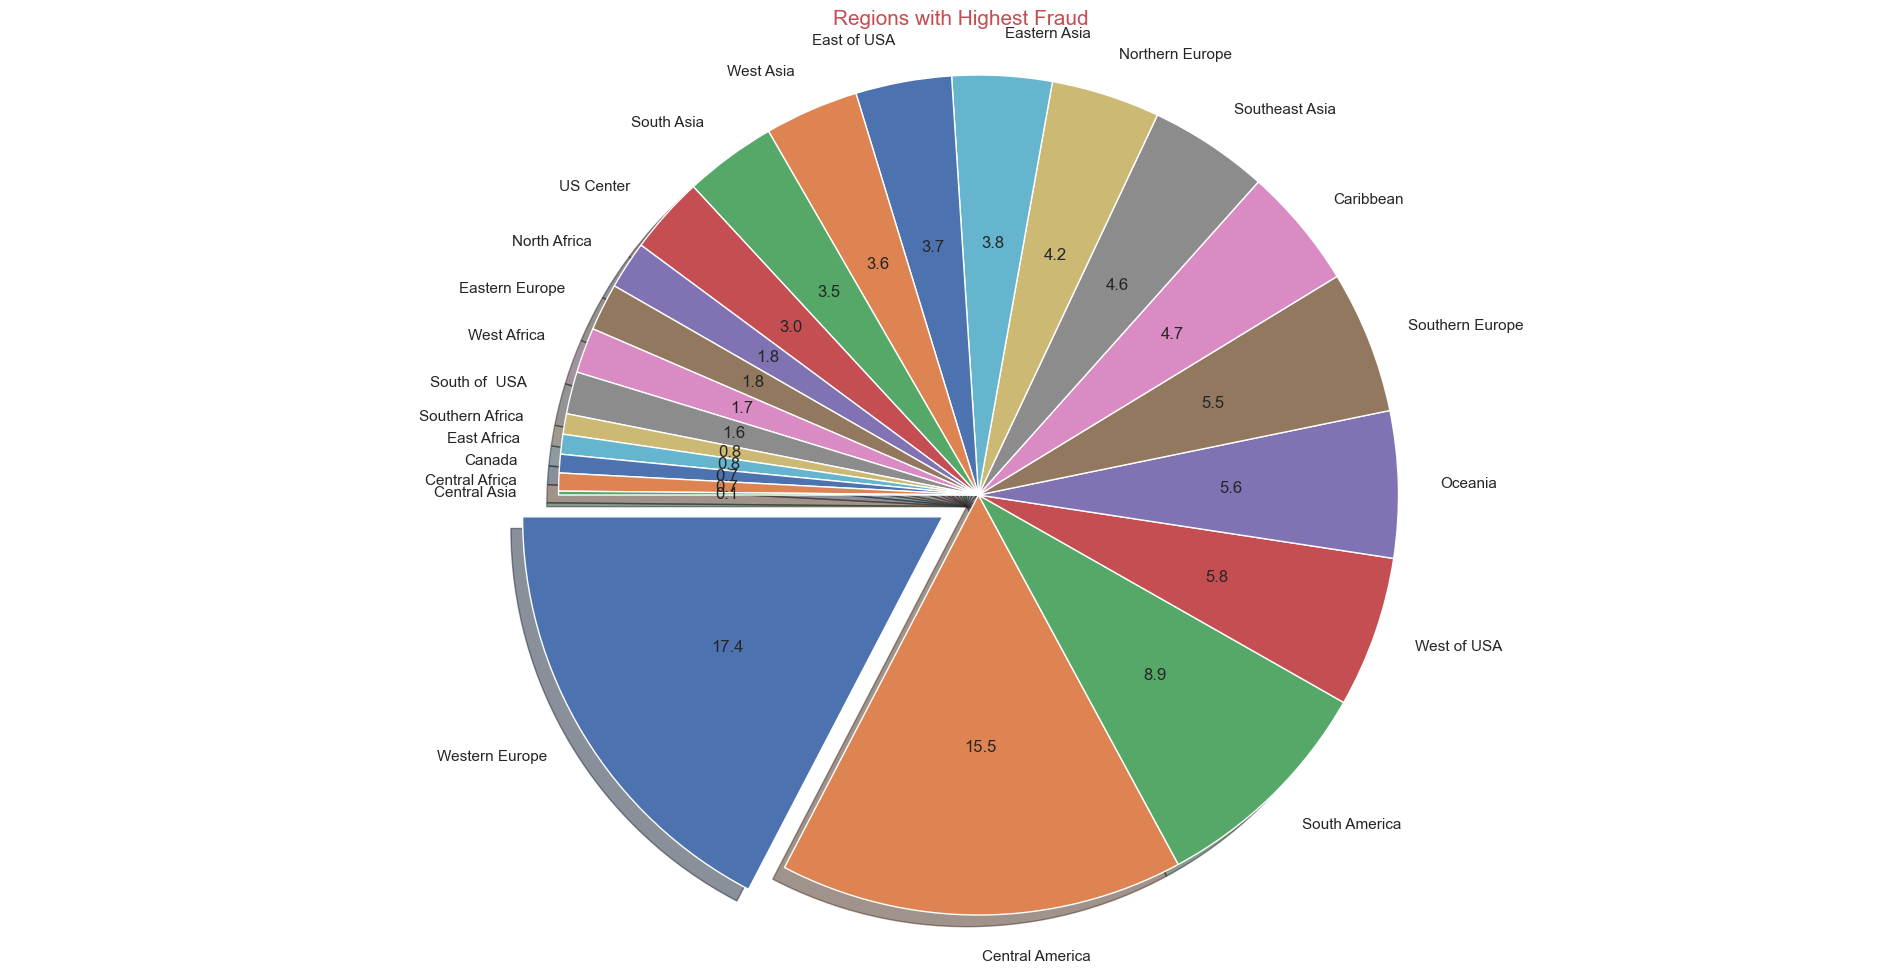

In [65]:
high_fraud = data[(data['Order Status'] == 'SUSPECTED_FRAUD') & (data['Type'] == 'TRANSFER')]#separating orders with suspected fraud
#Plotting pie chart with respect to order region
fraud=high_fraud['Order Region'].value_counts().plot.pie(figsize=(24,12),
                                                  startangle=180, explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),autopct='%.1f',shadow=True,)
plt.title("Regions with Highest Fraud",size=15,color='r') # Plotting title
plt.ylabel(" ")
fraud.axis('equal') 
plt.show()

### Logistics analysis

In [66]:
data_delivery_status=data.groupby(['Delivery Status'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(x=data_delivery_status['Delivery Status'] , y=data_delivery_status['Number of Orders']  , color=data_delivery_status['Number of Orders'],
      labels = { 'Delivery Status': 'Delivery Status', 'Number of Orders': 'Number of Orders'})

In [67]:
data_delivery_status_region=df1.groupby(['Delivery Status', 'Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(data_delivery_status_region, x='Delivery Status', y='Number of Orders'  , color='Order Region',
      )

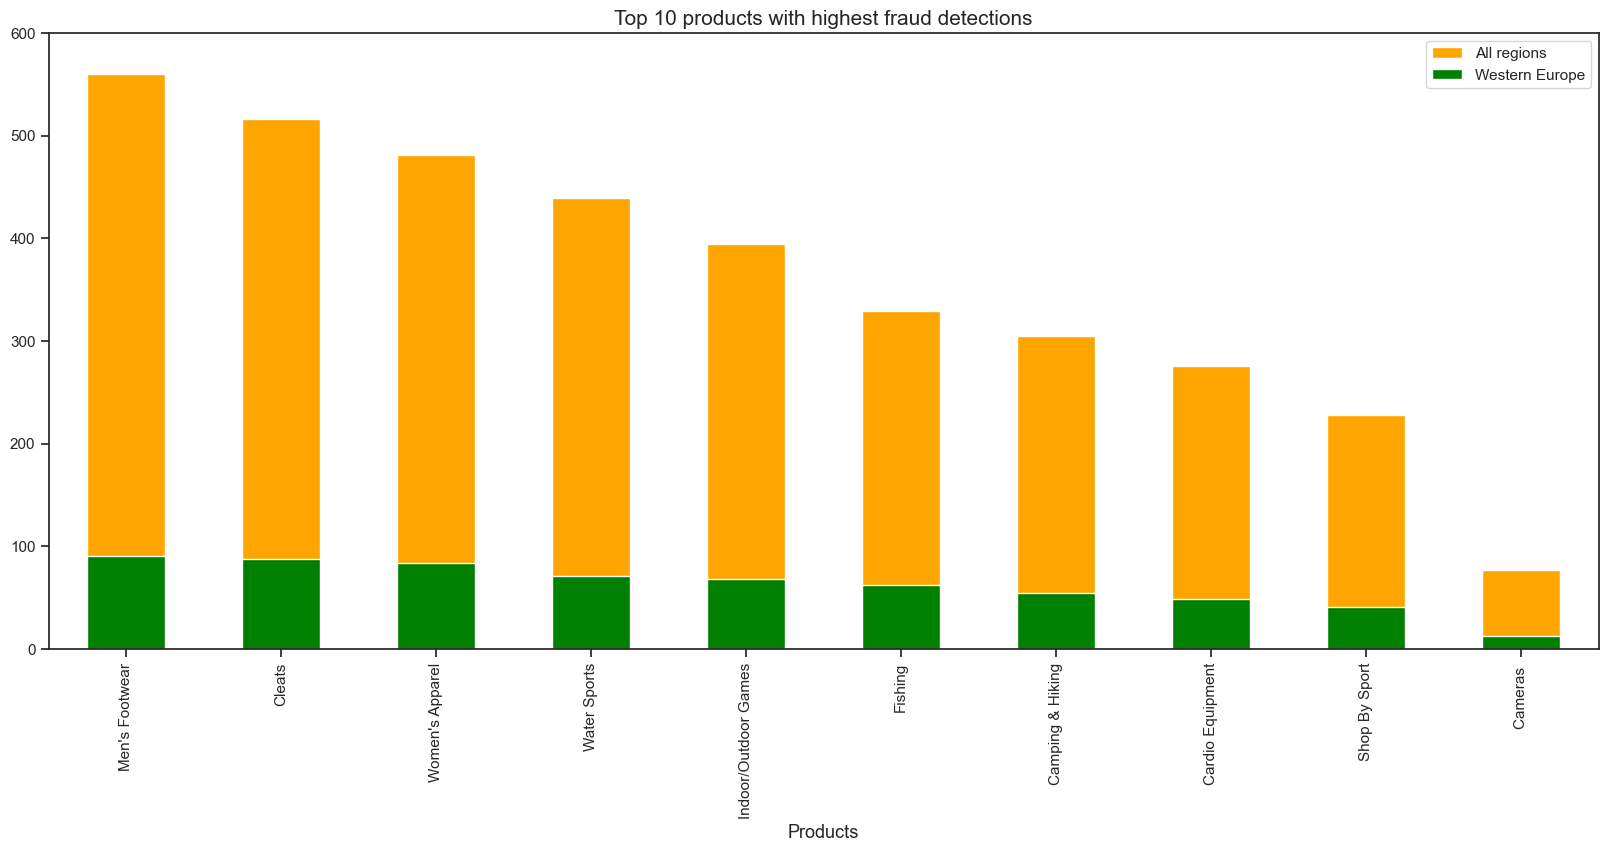

In [68]:
high_fraud1 = data[(data['Order Status'] == 'SUSPECTED_FRAUD')] # 
high_fraud2 = data[(data['Order Status'] == 'SUSPECTED_FRAUD') &(data['Order Region'] == 'Western Europe')]
#Plotting bar chart for top 10 most suspected fraud department in all regions
fraud1=high_fraud1['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud Category",color='orange')
#Plotting bar chart for top 10 most suspected fraud department in Western Europe
fraud2=high_fraud2['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud product in Western Europe",color='green')
plt.legend(["All regions", "Western Europe"])
plt.title("Top 10 products with highest fraud detections", size=15)
plt.xlabel("Products", size=13)
plt.ylim(0,600)
plt.show()

<Axes: title={'center': 'Top 10 products with most late deliveries'}>

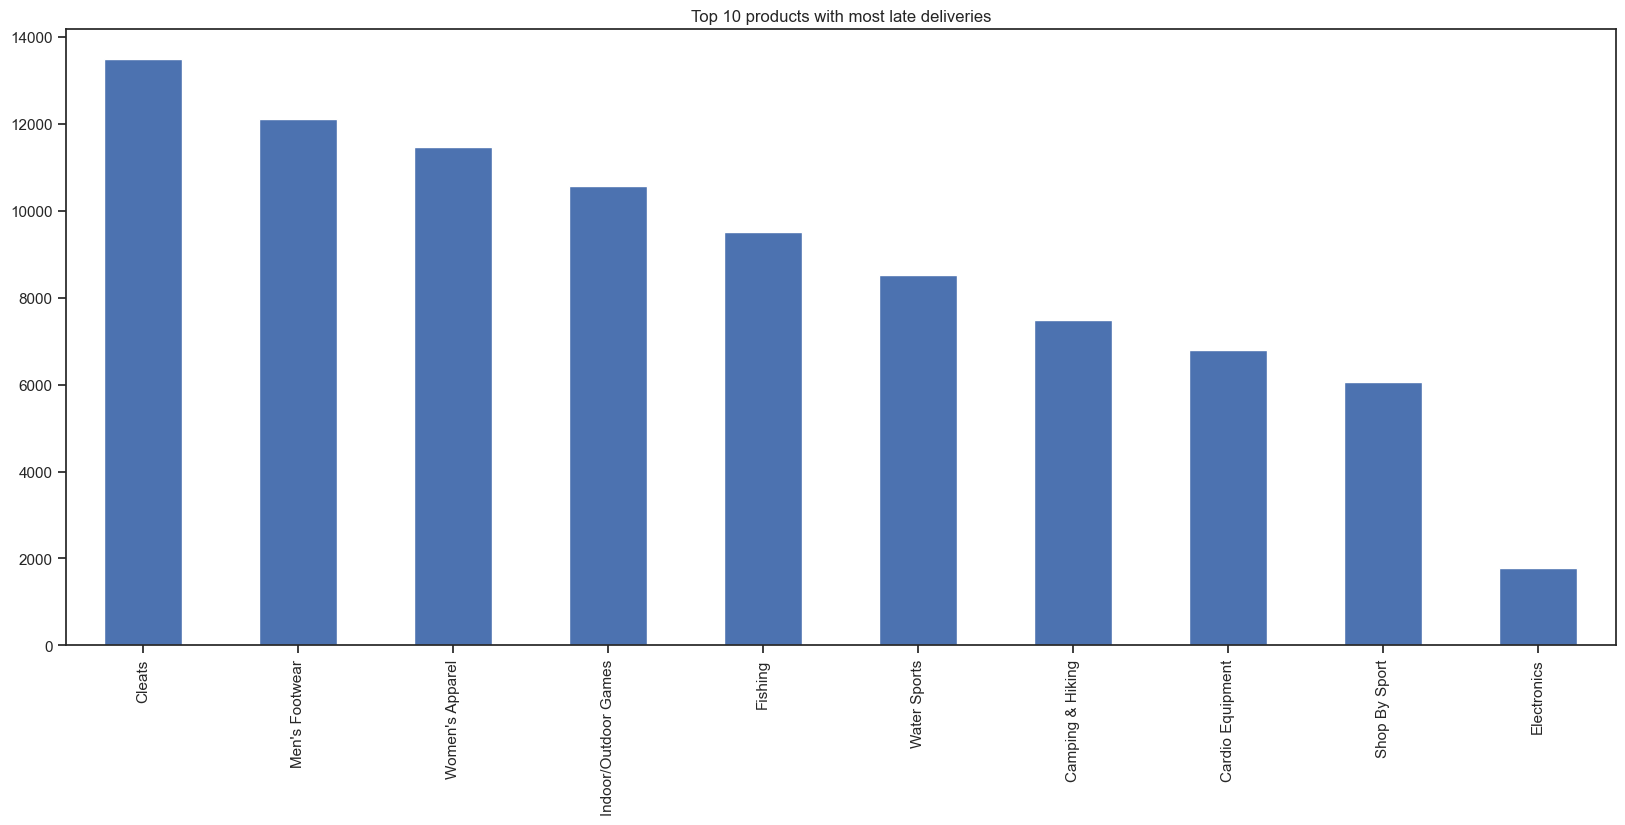

In [69]:
#Filtering columns with late delivery status
late_delivery = data[(data['Delivery Status'] == 'Late delivery')]
#Top 10 products with most late deliveries
late_delivery['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 products with most late deliveries")

## Forecasting

In [70]:
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.linear_model import Ridge,LinearRegression,LogisticRegression,ElasticNet,Lasso,Ridge,SGDClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor,BaggingClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve,auc,classification_report

from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import *
from sklearn import metrics

In [71]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [72]:
data['SUSPECTED_FRAUD'] = np.where(data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)

In [73]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x

In [74]:
features=data.drop(columns=['SUSPECTED_FRAUD','Order Status' ])
target=data['SUSPECTED_FRAUD']

In [75]:
features=features.apply(Labelencoder_feature)
features.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,order_year,order_month,order_week_day,order_hour,order_month_year
0,1,3,3,18934,2568,0,0,47,40,66,...,78,62,0,3238,3,3,0,6,22,36
1,3,5,3,2272,2559,1,1,47,40,66,...,78,62,0,20134,3,3,0,2,12,36
2,0,4,3,2293,2555,3,0,47,40,452,...,78,62,0,19905,3,3,0,2,12,36
3,1,3,3,13638,2546,0,0,47,40,285,...,78,62,0,19677,3,3,0,2,11,36
4,2,2,3,20599,2526,0,0,47,40,66,...,78,62,0,19453,3,3,0,2,11,36


In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(features,target, test_size = 0.2, random_state = 42)

In [77]:
lgr_pipline  = Pipeline([("scaler", StandardScaler()), ("LogisticRegression", LogisticRegression())])
rfc_pipline = Pipeline([("scaler", StandardScaler()), ("RandomForestClassifier", RandomForestClassifier())])
knn_pipline = Pipeline([("scaler", StandardScaler()), ("KNeighborsClassifier", KNeighborsClassifier())])
gnb_pipline = Pipeline([("scaler", StandardScaler()), ("GaussianNB", GaussianNB())])
sgd_pipline = Pipeline([("scaler", StandardScaler()), ("SGDClassifier", SGDClassifier())])
dt_pipline = Pipeline([("scaler", StandardScaler()), ("DecisionTreeClassifier", DecisionTreeClassifier())])

In [78]:
pip_dict1 ={0:'Logistic Regression' , 1:'RandomForestClassifier' , 2: 'KNeighborsClassifier' ,
            3: 'GaussianNB', 4: 'SGDClassifier', 5: 'DecisionTreeClassifier' }

piplines1=[lgr_pipline, rfc_pipline , knn_pipline, gnb_pipline  , sgd_pipline , dt_pipline ]

In [79]:
scores_df = pd.DataFrame(columns = ["Model", "CVScores"])
for i, pipe in enumerate(piplines1):
    score = cross_val_score(pipe, features, target, cv = 10)
    print(pip_dict1[i], ": ", score.mean())

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\admin\anaconda3\Lib\site-packages

Logistic Regression :  0.9763127508595405
RandomForestClassifier :  0.9839906306408622
KNeighborsClassifier :  0.9743462097560617
GaussianNB :  0.9795478562150082
SGDClassifier :  0.9754818155438484
DecisionTreeClassifier :  0.9906491686411852


In [80]:
# grid_params = [
#     {"classifier": [RandomForestClassifier()],
#     "classifier__n_estimators": [50,100,150,200,250,300],
#     "classifier__criterion": ["gini", "entropy"],
#     "classifier__max_features": ["auto", "sqrt", "log2"],
#     },
# ]

In [81]:
pipeline_rfl = Pipeline([('scaler', StandardScaler()), 
                           ('andomForestClassifier', RandomForestClassifier(criterion='entropy'))])

In [82]:
model_rfl = pipeline_rfl.fit(X_train, Y_train)

In [83]:
rfl_test_predict = pd.DataFrame({'actual' : Y_test,
                                 'predicted' : model_rfl.predict(X_test)})
rfl_test_predict.head()

,actual,predicted
80120,0,0
19670,0,0
114887,0,0
120110,0,0
56658,0,0


In [84]:
print('Accuracy Score for test dataset : ' , metrics.accuracy_score(rfl_test_predict.actual, rfl_test_predict.predicted))

Accuracy Score for test dataset :  0.9953467759805008


### Sales

In [85]:
data_sales=df[['Order Id', 'Order Item Discount', 'Order Item Cardprod Id',
       'shipping date (DateOrders)', 'order date (DateOrders)',
       'Order Customer Id', 'Order Profit Per Order', 'Market',
       'Order Region', 'Order State', 'Order Item Total',
       'Department Name', 'Product Card Id', 'Customer Id',
       'Product Category Id', 'Product Image', 'Category Name',
       'Product Name', 'Product Price', 'Sales per customer',
       'Benefit per order', 'Order Zipcode', 'Order Item Id',
       'Order City', 'Customer Segment']]
target_sales = df['Sales']

In [86]:
data_sales = data_sales.apply(Labelencoder_feature)
data_sales.head()


,Order Id,Order Item Discount,Order Item Cardprod Id,shipping date (DateOrders),order date (DateOrders),Order Customer Id,Order Profit Per Order,Market,Order Region,Order State,...,Product Image,Category Name,Product Name,Product Price,Sales per customer,Benefit per order,Order Zipcode,Order Item Id,Order City,Customer Segment
0,65749,426,114,3238,23841,20649,18934,3,15,475,...,78,40,78,62,2568,18934,609,180516,331,0
1,64486,498,114,20134,19499,19386,2272,3,13,841,...,78,40,78,62,2559,2272,609,179253,391,0
2,64485,529,114,19905,19498,19385,2293,3,13,841,...,78,40,78,62,2555,2293,609,179252,391,0
3,64484,600,114,19677,19497,19384,13638,3,11,835,...,78,40,78,62,2546,13638,609,179251,3226,2
4,64483,682,114,19453,19496,19383,20599,3,11,835,...,78,40,78,62,2526,20599,609,179250,3226,1


In [87]:
x_train_sales, x_test_sales, y_train_sales, y_test_sales = train_test_split(data_sales, target_sales, test_size = 0.3, random_state = 42)

In [88]:
lr_pipeline = Pipeline([("scaler", StandardScaler()), ("linear_regression", LinearRegression())])
ridge_pipeline = Pipeline([("scaler", StandardScaler()), ("ridge_regressor", Ridge(random_state = 42))])
lasso_pipeline = Pipeline([("scaler", StandardScaler()), ("lasso_regressor", Lasso(random_state = 42))])
random_forest_pipeline = Pipeline([("scaler", StandardScaler()), ("randomforest_regression", RandomForestRegressor(random_state = 42))])
xgboost_pipeline = Pipeline([("scaler", StandardScaler()), ("xgboost_regression", XGBRegressor())])
knnr_pipeline = Pipeline([("scaler", StandardScaler()), ("knn_regression", KNeighborsRegressor())])

In [89]:
pipelines2 = [lr_pipeline, ridge_pipeline, lasso_pipeline,
            xgboost_pipeline, knnr_pipeline]

pipe_dict2 = {0: "Linear Regression", 1: "Ridge",
            2: "Lasso", 3: "XGBoost", 4: "KNN"}

In [90]:
scores_df = pd.DataFrame(columns = ["Model", "CVScores"])
for i, pipe in enumerate(pipelines2):
    score = cross_val_score(pipe, data_sales,target_sales, cv = 5)
    print(pipe_dict2[i], ": ", score.mean())

Linear Regression :  0.7841546573840146
Ridge :  0.7842406455947641
Lasso :  0.7797236568943091
XGBoost :  0.999855982352768
KNN :  0.9373468144433229


In [91]:
pipeline_XGBRegressor = Pipeline([('scaler', StandardScaler()), ('XGBRegressor',  XGBRegressor(importance_type='gain', n_estimators=300, ))])

In [92]:
model = pipeline_XGBRegressor.fit(x_train_sales, y_train_sales)

In [93]:
XGB_train_predict = pd.DataFrame({'actual' : y_train_sales,
                                 'predicted' : model.predict(x_train_sales)})
XGB_train_predict.head()

,actual,predicted
99963,149.940002,150.003296
63538,210.850006,210.612854
6661,179.970001,179.981033
93913,129.990005,129.993515
90626,129.990005,129.983032


In [94]:
predict = model.predict(x_test_sales)
predict

array([199.99092 , 249.998   , 249.86569 , ..., 120.055756, 249.81517 ,
       399.9747  ], dtype=float32)

In [95]:
r2_score(y_test_sales, predict, multioutput='uniform_average')

0.9999877976956217

# Deep Learning

In [96]:
train_data=data.copy()

In [97]:
train_data['fraud'] = np.where(train_data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
train_data['late_delivery']=np.where(train_data['Delivery Status'] == 'Late delivery', 1, 0)

In [98]:
train_data.drop(['Delivery Status','Late_delivery_risk','Order Status','order_month_year','order date (DateOrders)','shipping date (DateOrders)','Customer Fname','Customer Lname','Customer Email','Customer Password','Customer Street','Product Image','Order Zipcode','Product Description','Department Id','SUSPECTED_FRAUD'], axis=1, inplace=True)

In [99]:
train_data.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Id                        int64
Customer Segment                  object
Customer State                    object
Customer Zipcode                 float64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market                            object
Order City                        object
Order Country                     object
Order Customer Id                  int64
Order Id                           int64
Order Item Cardprod Id             int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Id   

In [100]:
# le = LabelEncoder()
#convert the categorical columns into numeric
train_data['Customer Country']  = le.fit_transform(train_data['Customer Country'])
train_data['Market']            = le.fit_transform(train_data['Market'])
train_data['Type']              = le.fit_transform(train_data['Type'])
train_data['Product Name']      = le.fit_transform(train_data['Product Name'])
train_data['Customer Segment']  = le.fit_transform(train_data['Customer Segment'])
train_data['Customer State']    = le.fit_transform(train_data['Customer State'])
train_data['Order Region']      = le.fit_transform(train_data['Order Region'])
train_data['Order City']        = le.fit_transform(train_data['Order City'])
train_data['Category Name']     = le.fit_transform(train_data['Category Name'])
train_data['Customer City']     = le.fit_transform(train_data['Customer City'])
train_data['Department Name']   = le.fit_transform(train_data['Department Name'])
train_data['Order State']       = le.fit_transform(train_data['Order State'])
train_data['Shipping Mode']     = le.fit_transform(train_data['Shipping Mode'])
train_data['order_week_day']    = le.fit_transform(train_data['order_week_day'])
train_data['Order Country']     = le.fit_transform(train_data['Order Country'])

#display the initial records
train_data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Id,...,Product Name,Product Price,Product Status,Shipping Mode,order_year,order_month,order_week_day,order_hour,fraud,late_delivery
0,1,3,4,91.250000,314.640015,73,40,66,1,20755,...,78,327.75,0,3,2018,1,6,22,0,0
1,3,5,4,-249.089996,311.359985,73,40,66,1,19492,...,78,327.75,0,3,2018,1,2,12,0,1
2,0,4,4,-247.779999,309.720001,73,40,452,0,19491,...,78,327.75,0,3,2018,1,2,12,0,0
3,1,3,4,22.860001,304.809998,73,40,285,0,19490,...,78,327.75,0,3,2018,1,2,11,0,0
4,2,2,4,134.210007,298.250000,73,40,66,1,19489,...,78,327.75,0,3,2018,1,2,11,0,0


In [101]:
#All columns expect fraud
xf=train_data.loc[:, train_data.columns != 'fraud']
#Only fraud column
yf=train_data['fraud']
#Splitting the data into two parts in which 80% data will be used for training the model and 20% for testing
xf_train, xf_test,yf_train,yf_test = train_test_split(xf,yf,test_size = 0.2,random_state = 42)
#All columns expect fraud
xl=train_data.loc[:, train_data.columns != 'late_delivery']
#Only fraud column
yl=train_data['late_delivery']
#Splitting the data into two parts in which 80% data will be used for training the model and 20% for testing
xl_train, xl_test,yl_train,yl_test = train_test_split(xl,yl,test_size = 0.2, random_state = 42)

In [102]:
xf_train.shape

(144415, 44)

In [103]:
sc = StandardScaler()
xf_train=sc.fit_transform(xf_train)
xf_test=sc.transform(xf_test)
xl_train=sc.fit_transform(xl_train)
xl_test=sc.transform(xl_test)

In [104]:
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense

In [105]:
keras.layers.BatchNormalization()
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(1024, activation='relu',kernel_initializer='random_normal', input_dim=44)) #Since we have 44 columns
#Third Hidden Layer
classifier.add(Dense(512, activation='relu',kernel_initializer='random_normal'))
#Fourth Hidden Layer
classifier.add(Dense(256, activation='relu',kernel_initializer='random_normal'))
#Fifth Hidden Layer
classifier.add(Dense(128, activation='relu',kernel_initializer='random_normal'))
#Sixth Hidden Layer
classifier.add(Dense(64, activation='relu',kernel_initializer='random_normal'))
#Seventh Hidden Layer
classifier.add(Dense(32, activation='relu',kernel_initializer='random_normal'))
#Eight Hidden Layer
classifier.add(Dense(16, activation='relu',kernel_initializer='random_normal'))
#Ninth Hidden Layer
classifier.add(Dense(8, activation='relu',kernel_initializer='random_normal'))
#Tenth Hidden Layer
classifier.add(Dense(4, activation='relu',kernel_initializer='random_normal'))
#Eleventh Hidden Layer
classifier.add(Dense(2, activation='relu',kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid',kernel_initializer='random_normal'))

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [106]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [107]:
classifier.fit(xf_train,yf_train, batch_size=512, epochs=40)

Epoch 1/40
283/283 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9666 - loss: 0.4925
Epoch 2/40
283/283 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9777 - loss: 0.1938
Epoch 3/40
283/283 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9778 - loss: 0.1068
Epoch 4/40
283/283 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9783 - loss: 0.1048
Epoch 5/40
283/283 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9773 - loss: 0.1086
Epoch 6/40
283/283 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9775 - loss: 0.1083
Epoch 7/40
283/283 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9782 - loss: 0.1055
Epoch 8/40
283/283 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9779 - loss: 0.1066
Epoch 9/40
283/283 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9787 - loss: 0.1032
Epoch 10/40
283/283 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9775 - loss: 0.1084
Epoch 11/40
283/283 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9779 - loss: 0.1065
Epoch 12/40
283/283 ━━━━━━━━━━━━━━━━━━━━

In [108]:
test_evaluate=classifier.evaluate(xf_test, yf_test)
print('accuracy for Test set is',test_evaluate)# evaluation of model.
yf_pred1=classifier.predict(xf_test,batch_size=512,verbose=1)
yf_pred=np.argmax(yf_pred1,axis=1)
print(f1_score(yf_test,yf_pred,average="weighted"))

1129/1129 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9774 - loss: 0.1093
accuracy for Test set is [0.11255764216184616, 0.976456880569458]
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
0.9648255733921929


In [109]:
xs=train_data.loc[:, train_data.columns != 'Sales']
ys=train_data['Sales']
xs_train, xs_test,ys_train,ys_test = train_test_split(xs,ys,test_size = 0.3, random_state = 42)
xq=train_data.loc[:, train_data.columns != 'Order Item Quantity']
yq=train_data['Order Item Quantity']
xq_train, xq_test,yq_train,yq_test = train_test_split(xq,yq,test_size = 0.3, random_state = 42)

In [110]:
scaler=MinMaxScaler()
xs_train=scaler.fit_transform(xs_train)
xs_test=scaler.transform(xs_test)
xq_train=scaler.fit_transform(xq_train)
xq_test=scaler.transform(xq_test)

In [111]:
regressor = Sequential()

#First Hidden Layer
regressor.add(Dense(512, activation='relu',kernel_initializer='normal',input_dim=44))
#Second  Hidden Layer
regressor.add(Dense(256, activation='relu',kernel_initializer='normal'))
#Third  Hidden Layer
regressor.add(Dense(256, activation='relu',kernel_initializer='normal'))
#Fourth  Hidden Layer
regressor.add(Dense(256, activation='relu',kernel_initializer='normal'))
#Fifth  Hidden Layer
regressor.add(Dense(256, activation='relu',kernel_initializer='normal'))

#Output Layer
regressor.add(Dense(1, activation='linear'))# Linear activation is used.

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [112]:
regressor.compile(optimizer='adam',loss='mean_absolute_error',metrics=['accuracy'])

In [113]:
regressor.fit(xq_train,yq_train, batch_size=256, epochs=50)

Epoch 1/50
494/494 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5100 - loss: 1.1289
Epoch 2/50
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5462 - loss: 1.1357
Epoch 3/50
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5508 - loss: 1.1290
Epoch 4/50
494/494 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5485 - loss: 1.1320
Epoch 5/50
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5471 - loss: 1.1383
Epoch 6/50
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5468 - loss: 1.1376
Epoch 7/50
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5440 - loss: 1.1414
Epoch 8/50
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5465 - loss: 1.1359
Epoch 9/50
494/494 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5478 - loss: 1.1365
Epoch 10/50
494/494 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5465 - loss: 1.1335
Epoch 11/50
494/494 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5475 - loss: 1.1308
Epoch 12/50
494/494 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

# Validation

In [114]:
pred_val_1 = model.predict([x_test_sales.iloc[12]])
real_val_1 = y_test_sales.iloc[12]
print(f"Predicted: {pred_val_1} vs Actual: {real_val_1}")
diff_1 = (abs(pred_val_1 - real_val_1) / real_val_1)*100
print(f"Error in values: {diff_1}")

Predicted: [129.99408] vs Actual: 129.9900055
Error in values: [0.00313416]


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [115]:
pred_val_2 = model.predict([x_test_sales.iloc[1100]])
real_val_2 = y_test_sales.iloc[1100]
print(f"Predicted: {pred_val_2} vs Actual: {real_val_2}")
diff_2 = (abs(pred_val_2 - real_val_2) / real_val_2)*100
print(f"Error in values: {diff_2}")

Predicted: [199.99036] vs Actual: 200.0
Error in values: [0.00482178]


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [116]:
pred_val_3 = model.predict([x_test_sales.iloc[8765]])
real_val_3 = y_test_sales.iloc[8765]
print(f"Predicted: {pred_val_3} vs Actual: {real_val_3}")
diff_3 = (abs(pred_val_3 - real_val_3) / real_val_3)*100
print(f"Error in values: {diff_3}")

Predicted: [79.82429] vs Actual: 79.98000336
Error in values: [0.1946936]


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [117]:
combined_test_sales = pd.concat([x_test_sales,y_test_sales],axis=1)

In [118]:
combined_test_sales.to_csv('combined_test_sales.csv',index=False)

In [119]:
#56702,689,92,61010,62437,9400,13077,1,17,246,2417,3,92,9400,28,21,9,21,60,2417,13077,609,170005,749,0,299.980011

model.predict([[56702,689,92,61010,62437,9400,13077,1,17,246,2417,3,92,9400,28,21,9,21,60,2417,13077,609,170005,749,0]])

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([299.98648], dtype=float32)

In [120]:
total_sales_data = combined_test_sales.copy()

In [121]:
total_sales_data['Sales_pred'] = model.predict(x_test_sales)

In [122]:
total_sales_data.head()

,Order Id,Order Item Discount,Order Item Cardprod Id,shipping date (DateOrders),order date (DateOrders),Order Customer Id,Order Profit Per Order,Market,Order Region,Order State,...,Product Name,Product Price,Sales per customer,Benefit per order,Order Zipcode,Order Item Id,Order City,Customer Segment,Sales,Sales_pred
80120,26142,615,99,7727,7079,6056,12491,4,21,188,...,70,52,1918,12491,497,78238,1876,0,199.990005,199.990921
19670,50901,207,37,12605,12587,11944,12365,2,3,346,...,59,22,2296,12365,609,152657,3139,0,250.000000,249.998001
114887,87,207,97,553,247,4230,20090,2,3,100,...,67,21,2294,20090,609,252,3180,1,249.899994,249.865692
120110,42273,841,92,19409,2293,3483,20120,0,16,360,...,21,60,2340,20120,609,126699,2565,0,299.980011,299.970612
56658,47212,404,44,8127,7996,11976,9511,2,1,892,...,102,18,1348,9511,609,141585,2869,0,119.970001,120.044678


<Axes: xlabel='Sales', ylabel='Sales_pred'>

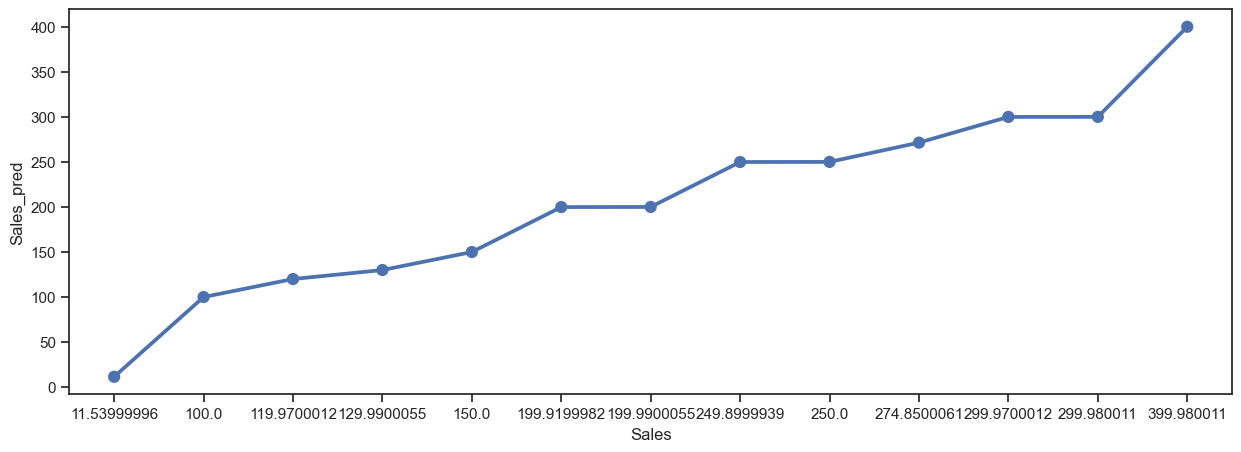

In [123]:
plt.figure(figsize=(15,5))
sns.pointplot(data=total_sales_data.iloc[0:20],x='Sales',y='Sales_pred')